In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.image as mpimg

np.set_printoptions(suppress=True)

In [7]:
# Makes a matrix homogeneous - appends one to the end of each row
def make_homo(no_homo):
    homo = np.hstack([no_homo, np.ones(no_homo.shape[0]).reshape(-1,1)])
    return homo

In [8]:
def DLT(x, X):
    # Txyz, X = Normalization(3, X)
    # Tuv, x = Normalization(2, x)
    
    A = []
    for i in range(x.shape[0]):
        A.append(
            [X[i][0], X[i][1], X[i][2], X[i][3],       0,       0,       0,       0, -x[i][0]*X[i][0], -x[i][0]*X[i][1], -x[i][0]*X[i][2], -x[i][0]]
            )
        A.append(
            [      0,       0,       0,       0, X[i][0], X[i][1], X[i][2], X[i][3], -x[i][1]*X[i][0], -x[i][1]*X[i][1], -x[i][1]*X[i][2], -x[i][1]]
            )
    
    A = np.asarray(A) * -1

    U,S,V = np.linalg.svd(A)
    
    # The column of V is the solution corresponding to the smallest singular value
    P = V[np.argmin(S)]

    # Reshape P to 3x4
    P = P.reshape(3,4)
    
    # Normalize
    # P = P/P[2, 3]


    return P

In [9]:
def project_points(P, X):
    x = P @ X.T
    x = x/x[2]
    return x.T[:, :2]

def get_projection_error(x, x_proj):
    return np.mean(np.linalg.norm(x_proj - x, axis=1))

In [10]:
def get_properties(P):
    KR = P[:, :3]
    Kt = P[:, 3]

    K, R  = np.linalg.qr(KR)
    
    K = K/K[2, 2]
    K_inv = np.linalg.pinv(K)

    t = K_inv @ Kt
    return K, R, t

In [11]:
def generate_projection_matrix(K, R, t):
    E = np.hstack([R, np.atleast_2d(t).T])
    I = K
    
    P = I @ E 
    return P

In [12]:
def plot_pts_on_image(image, lists_of_points, colors):
    %matplotlib inline

    fig = plt.figure(figsize=(10,10))

    imgplot = plt.imshow(image)
   
    idx = 0
    for points in lists_of_points:
        x = np.array(points)
        N = x.shape[0]
        area = (10 * np.ones(N))**2 

        print(x.shape)
        plt.scatter(x[:, 0], x[:,1], c = colors[idx], s = area)
        idx += 1
    plt.show()

In [140]:
# %matplotlib tk
# image_points = []
# fig = plt.figure(figsize=(20,30))

# def onclick(event):
#     ix, iy = event.xdata, event.ydata
#     print(ix, iy)
#     image_points.append([ix, iy])

# cid = fig.canvas.mpl_connect('button_press_event', onclick)

# imgplot = plt.imshow(img_2)
# plt.show()

In [14]:
world_coords = np.array(
                [
                    # Top-Left Edge
                    [1, 0, 0],
                    [2, 0, 0],
                    [3, 0, 0],

                    # Orange Face
                    [1, 1, 0],
                    [2, 1, 0],
                    [3, 1, 0],
                    [1, 2, 0],
                    [2, 2, 0],
                    [3, 2, 0],
                    [1, 3, 0],
                    [2, 3, 0],
                    [3, 3, 0],

                    # Top-Right Edge
                    [0, 0, 1],
                    [0, 0, 2],
                    [0, 0, 3],

                    # Green Face
                    [1, 0, 1],
                    [2, 0, 1],
                    [3, 0, 1],
                    [1, 0, 2],
                    [2, 0, 2],
                    [3, 0, 2],
                    [1, 0, 3],
                    [2, 0, 3],
                    [3, 0, 3],

                    # Front Edge
                    [0, 1, 0],
                    [0, 2, 0],
                    [0, 3, 0],

                    # Yellow Face
                    [0, 1, 1],
                    [0, 2, 1],
                    [0, 3, 1],
                    [0, 1, 2],
                    [0, 2, 2],
                    [0, 3, 2],
                    [0, 1, 3],
                    [0, 2, 3],
                    [0, 3, 3],
                ]
                )

# Image 1 (Cube-01)

In [15]:
img_1=mpimg.imread('../images/Section-3/cube-01.jpg')
imgplot = plt.imshow(img_1)

In [16]:
img_coords_1 = np.array(
                [
                    # Top-Left Edge
                    [1959.036558719197, 1444.6922687851525],
                    [1647.4680608570154, 1335.440977326985],
                    [1388.5020366598776, 1242.3750623811384],
                    
                    
                    # Top-Right Edge
                    [2533.617424906597, 1400.1824833762694],
                    [2723.79559892637, 1262.6067830215397],
                    [2853.278611024939, 1157.4018356914526],

                    # Middle Edge
                    [2294.8831213498606, 1914.068187642465],
                    [2294.8831213498606, 2258.0074385292887],
                    [2290.83677722178, 2525.0661509825873],
                ]
)

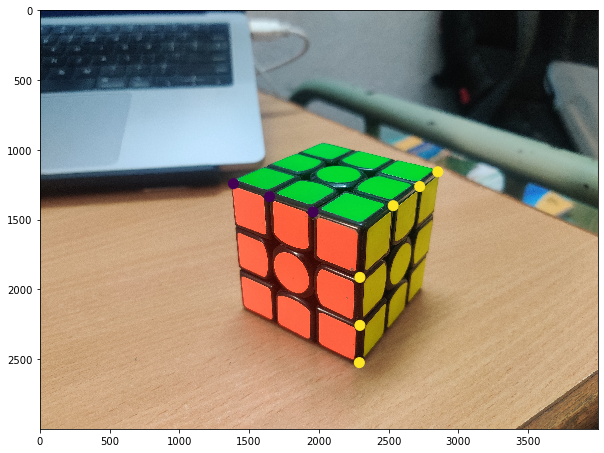

In [17]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))
imgplot = plt.imshow(img_1)

N = len(img_coords_1)

colors = np.arange(N)

cs = np.arange(0, 255, 255/ 6)
colors[:3] = cs[0]
colors[3:12] = cs[1]
colors[12:15] = cs[2]
colors[15:24] = cs[3]
colors[24:27] = cs[4]
colors[27:36] = cs[5]


area = (10 * np.ones(N))**2 

plt.scatter(img_coords_1[:,0], img_coords_1[:,1], c=colors, s=area)
plt.show()

In [18]:
world_coords_1 = np.array(
                [
                    # Top-Left Edge
                    [1, 0, 0],
                    [2, 0, 0],
                    [3, 0, 0],

                    # Top-Right Edge
                    [0, 0, 1],
                    [0, 0, 2],
                    [0, 0, 3],

                    # Front Edge
                    [0, 1, 0],
                    [0, 2, 0],
                    [0, 3, 0],

                ]
                )

In [19]:
x1 = make_homo(img_coords_1)
X1 = make_homo(world_coords_1)

In [20]:
P1 = DLT(x1, X1)

In [21]:
K1, R1, T1 = get_properties(P1)

In [22]:
x_proj_1 = make_homo(project_points(P1, X1))
get_projection_error(x1, x_proj_1)

6.599260547520024

(9, 3)
(9, 3)


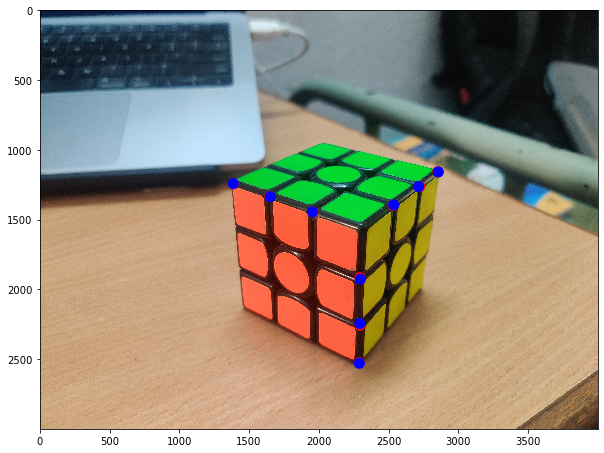

In [23]:
plot_pts_on_image(img_1, [x1, x_proj_1], ['r', 'b'])

(9, 3)
(9, 3)
(36, 3)


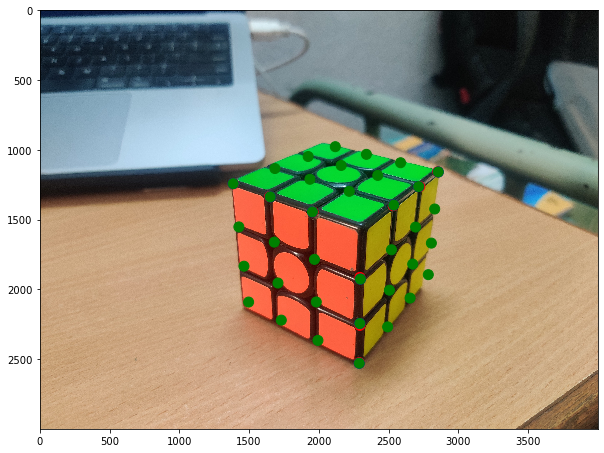

In [24]:
proj_all_1 = make_homo(project_points(P1, make_homo(world_coords)))
plot_pts_on_image(img_1, [x1, x_proj_1, proj_all_1], ['r', 'b', 'g'])

# Image 2 (Cube-02)

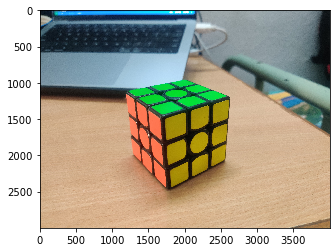

In [25]:
img_2=mpimg.imread('../images/Section-3/cube-02.jpg')
imgplot = plt.imshow(img_2)

In [26]:
img_coords_2 = np.array(
    [
        # Top-Left Edge
        [1493.7069839899648, 1339.4873214550653],
        [1323.7605306105932, 1218.0969976126567],
        [1202.370206768185, 1133.1237709229708],
        
        # Top-Right Edge
        [2031.8707530246422, 1363.765386223547],
        [2355.5782832710647, 1274.7458154057808],
        [2618.5906515962824, 1205.957965228416],
        
        # Middle Edge
        [1704.1168786501396, 1833.1413050808594],
        [1744.5803199309423, 2181.1269000957636],
        [1768.858384699424, 2456.2783008052224]
    ]
)

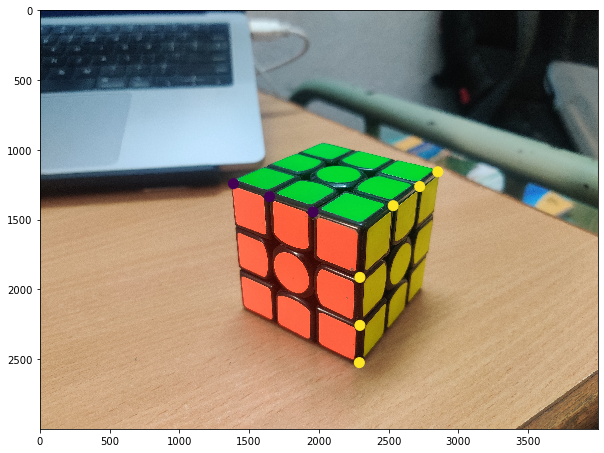

In [27]:
fig = plt.figure(figsize=(10,10))
imgplot = plt.imshow(img_1)

N = len(img_coords_1)

colors = np.arange(N)

cs = np.arange(0, 255, 255/ 6)
colors[:3] = cs[0]
colors[3:12] = cs[1]
colors[12:15] = cs[2]
colors[15:24] = cs[3]
colors[24:27] = cs[4]
colors[27:36] = cs[5]


area = (10 * np.ones(N))**2 

plt.scatter(img_coords_1[:,0], img_coords_1[:,1], c=colors, s=area)
plt.show()

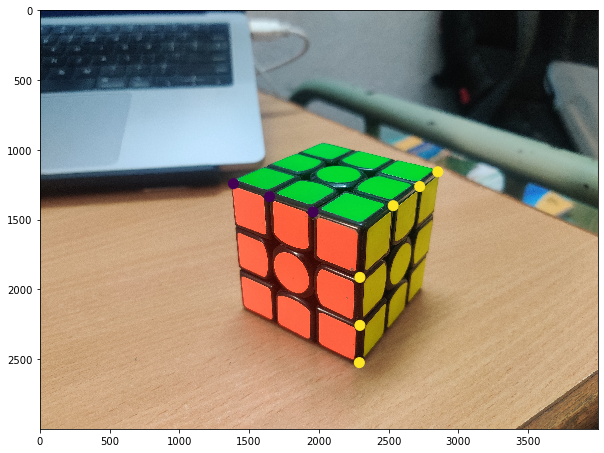

In [28]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))
imgplot = plt.imshow(img_1)

N = len(img_coords_1)

colors = np.arange(N)

cs = np.arange(0, 255, 255/ 6)
colors[:3] = cs[0]
colors[3:12] = cs[1]
colors[12:15] = cs[2]
colors[15:24] = cs[3]
colors[24:27] = cs[4]
colors[27:36] = cs[5]


area = (10 * np.ones(N))**2 

plt.scatter(img_coords_1[:,0], img_coords_1[:,1], c=colors, s=area)
plt.show()

In [29]:
world_coords_2 = np.array(
                [
                    # Top-Left Edge
                    [1, 0, 0],
                    [2, 0, 0],
                    [3, 0, 0],

                    # Top-Right Edge
                    [0, 0, 1],
                    [0, 0, 2],
                    [0, 0, 3],

                    # Front Edge
                    [0, 1, 0],
                    [0, 2, 0],
                    [0, 3, 0],

                ]
                )

In [30]:
x2 = make_homo(img_coords_2)
X2 = make_homo(world_coords_2)

In [31]:
P2 = DLT(x2, X2)

In [32]:
K2, R2, T2 = get_properties(P2)

In [33]:
x_proj_2 = make_homo(project_points(P2, X2))
get_projection_error(x2, x_proj_2)

6.6877478646757424

(9, 3)
(9, 3)


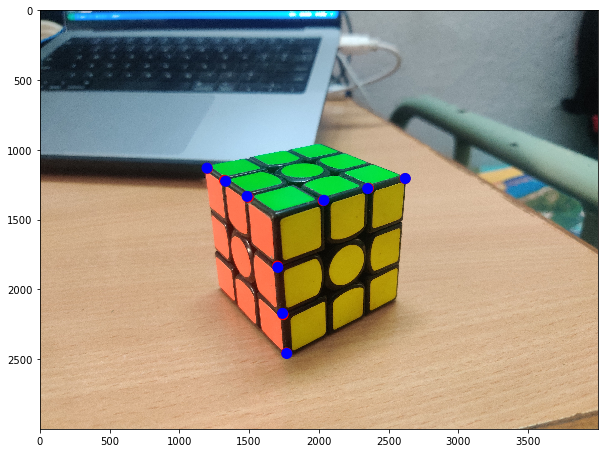

In [34]:
plot_pts_on_image(img_2, [x2, x_proj_2], ['r', 'b'])

(9, 3)
(9, 3)
(36, 3)


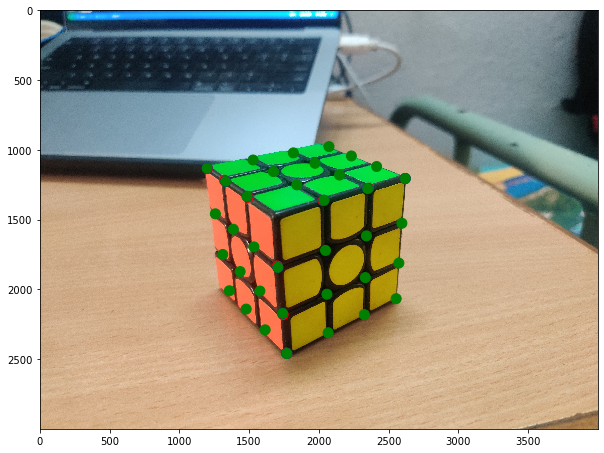

In [35]:
proj_all_2 = make_homo(project_points(P2, make_homo(world_coords)))
plot_pts_on_image(img_2, [x2, x_proj_2, proj_all_2], ['r', 'b', 'g'])

# Triangulation

### Knowns

In [36]:
matched_points = {
    'image_1' : make_homo(img_coords_1),
    'image_2' : make_homo(img_coords_2)
}

matched_points

{'image_1': array([[1959.03655872, 1444.69226879,    1.        ],
        [1647.46806086, 1335.44097733,    1.        ],
        [1388.50203666, 1242.37506238,    1.        ],
        [2533.61742491, 1400.18248338,    1.        ],
        [2723.79559893, 1262.60678302,    1.        ],
        [2853.27861102, 1157.40183569,    1.        ],
        [2294.88312135, 1914.06818764,    1.        ],
        [2294.88312135, 2258.00743853,    1.        ],
        [2290.83677722, 2525.06615098,    1.        ]]),
 'image_2': array([[1493.70698399, 1339.48732146,    1.        ],
        [1323.76053061, 1218.09699761,    1.        ],
        [1202.37020677, 1133.12377092,    1.        ],
        [2031.87075302, 1363.76538622,    1.        ],
        [2355.57828327, 1274.74581541,    1.        ],
        [2618.5906516 , 1205.95796523,    1.        ],
        [1704.11687865, 1833.14130508,    1.        ],
        [1744.58031993, 2181.1269001 ,    1.        ],
        [1768.8583847 , 2456.27830081,   

In [37]:
P1, P2
# We also have (K1, R1, C1) and (K2, R2, C2) 

(array([[ 0.06870485, -0.04755324, -0.21648904, -0.79227986],
        [ 0.00492319, -0.16435172, -0.0150288 , -0.53961259],
        [-0.0000262 , -0.0000214 , -0.00005355, -0.00034401]]),
 array([[-0.0224993 ,  0.07423384,  0.23454924,  0.70904467],
        [-0.00535303,  0.22440215,  0.00954442,  0.62108709],
        [ 0.00003657,  0.00003365,  0.00003795,  0.0004253 ]]))

### To find :- 3D coords of matched points ??

In [ ]:
def triangulation_statistical(point_pair, P1, P2):
    x1 = point_pair[0]
    x2 = point_pair[1]
    

    A = []
    # equations for Point 1
    A.append(   x1[1] * P1[2] - P1[1]   )
    A.append(   P1[0] - x1[0] * P1[2]   )
    # equations for point 2
    A.append(   x2[1] * P2[2] - P2[1]   )
    A.append(   P2[0] - x2[0] * P2[2]   )
    A = np.array(A)

    # SVD
    U,S,V = np.linalg.svd(A)

    X = V[np.argmin(S)]

    X = X / X[3]
    return X

In [129]:
pair_id = 1

# Get the matched points
x1 = matched_points['image_1'][pair_id]
x2 = matched_points['image_2'][pair_id]

X_actual = make_homo(world_coords)[pair_id]
X_actual

print("Actual World Coordinates :- ")
print(X_actual.tolist()[:3])

Actual World Coordinates :- 
[2.0, 0.0, 0.0]


In [130]:
X_calc = triangulation_statistical([x1, x2], P1, P2)
print("Calculated 3D world coords :- ")
X_calc.tolist()[:3]

Calculated 3D world coords :- 


[1.980342709190976, -0.025470030088197756, -0.02761210197274873]

In [131]:
print("Error :-")
np.linalg.norm(X_calc - X_actual)

Error :-


0.04239763778794419

In [139]:
for pair_id in range(matched_points['image_1'].shape[0]):
    print("-"*10)
    print("Pair ID :- ", pair_id)
    # Get the matched points
    x1 = matched_points['image_1'][pair_id]
    x2 = matched_points['image_2'][pair_id]

    X_actual = make_homo(world_coords_2)[pair_id]
    X_actual

    print("Actual World Coordinates :- ", X_actual.tolist()[:3])

    X_calc = triangulation_statistical([x1, x2], P1, P2)
    print("Calculated 3D world coords :- ", X_calc.tolist()[:3])
    print("Error :-", np.linalg.norm(X_calc - X_actual))

----------
Pair ID :-  0
Actual World Coordinates :-  [1.0, 0.0, 0.0]
Calculated 3D world coords :-  [1.0077948865333175, 0.01980743954566661, 0.02093170908918705]
Error :- 0.029853498334648954
----------
Pair ID :-  1
Actual World Coordinates :-  [2.0, 0.0, 0.0]
Calculated 3D world coords :-  [1.980342709190976, -0.025470030088197756, -0.02761210197274873]
Error :- 0.04239763778794419
----------
Pair ID :-  2
Actual World Coordinates :-  [3.0, 0.0, 0.0]
Calculated 3D world coords :-  [3.011956137074382, 0.010616487589564285, 0.011700440114609646]
Error :- 0.019813109835569838
----------
Pair ID :-  3
Actual World Coordinates :-  [0.0, 0.0, 1.0]
Calculated 3D world coords :-  [0.001256310799298994, 0.0051874531711001695, 0.9849703828088535]
Error :- 0.015949212524109094
----------
Pair ID :-  4
Actual World Coordinates :-  [0.0, 0.0, 2.0]
Calculated 3D world coords :-  [-0.026466528698984165, -0.01333055277921296, 1.995898526614852]
Error :- 0.029916598448062458
----------
Pair ID :-  